<img src="./img/Circuit.png" style="width: 50%; height: 50%"> </img>

<img src="./img/treqs.png" style="width: 50%; height: 50%"> </img>

$$ CPE_{x} = \frac{1}{Q_x(\imath\omega)^{p_x}}, \ x=H, M, L, E $$

$$ R(\omega) = R_{\infty}+\sum_{x=H, M, L, E}\frac{1}{\frac{1}{R_x}+\frac{1}{CPE_x(\omega)}}$$

$$ R(\omega) = R_{\infty}+\sum_{x=M, L}\frac{1}{\frac{1}{R_x}+\frac{1}{CPE_x(\omega)}}$$

- H: High frequency
- M: Middle (possibly 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 9 days


In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("../data/Kimberlite-2015-07-17.xls")

In [4]:
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Ro","Rh","Qh","Ph", "pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [5]:
data_active

,Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],Chargeability [ms],...,pQm,Rl,Ql,Pl,pRl,pQl,Re,Qe,Pe-f,Pe-i
3,VK,K1P-0240,NaN,NaN,111.6,0.000642,38.183914,0.030233,2.221620,0.5439,...,2.866e-06,602.3,3.2e-06,0.665,1393,7.25e-07,10000000000,0.002534,0.2067,-2.121
5,VK,K1P-0531,NaN,NaN,87.5,0.000603,13501.390421,0.022101,2.545503,0.6497,...,6.92e-12,185300,5.433e-08,0.433,1410000,4.978e-09,10000000000,9.698e-06,0.2674,0.03658
7,HK,K1P-0535,NaN,NaN,135.1,0.013182,10090.413234,0.022235,2.674294,45.6,...,1.036e-09,578400,7.246e-07,0.177,36980,6.445e-07,10000000000,0.0001862,0.4612,0.752
9,HK,K1P-0540,NaN,NaN,163.8,0.006001,2204.463074,0.022346,2.759935,18.31,...,3.046e-10,47360,8.84e-06,0.1809,151700,1.59e-06,10000000000,0.007566,0.4576,0.7399
15,VK,K1P-0589,64.326044,-109.812725,78.0,0.000628,48.916840,0.022245,2.099668,0.2669,...,6.115e-07,762.8,2.624e-06,0.6791,4150,3.152e-07,10000000000,0.0009501,0.5222,1.534
16,VK,K1P-0589,64.326044,-109.812725,78.0,NaN,49.965791,0.021649,2.084449,NaN,...,4.922e-07,706.7,4.353e-06,0.6424,5240,4.074e-07,10000000000,0.002632,0.231,1.847
17,VK,K1P-0590,64.326044,-109.812725,85.9,0.000766,187.757995,0.022602,2.403881,0.7856,...,3.426e-08,2247,6.04e-06,0.5753,22500,4.404e-07,10000000000,0.0008284,0.2171,-2.034
18,VK,K1P-0590,64.326044,-109.812725,85.9,0.000782,66.229958,0.022322,2.296125,0.2139,...,3.486e-07,1064,1.697e-06,0.7258,5315,2.18e-07,10000000000,0.0005173,0.4395,-2.239
19,HK,K1P-0591,64.326044,-109.812725,122.4,0.001167,47.798493,0.026205,2.385503,0.9152,...,6.146e-07,395,4.273e-05,0.4269,6645,1.992e-06,10000000000,0.001293,0.9516,0.7104
21,HK,K1P-0593,64.326044,-109.812725,135.4,0.004224,17612.473012,0.021637,2.608411,5.453,...,3.33e-12,216600,5.428e-07,0.2842,2370000,3.672e-08,10000000000,5.736e-05,0.941,1.935


In [6]:
def CPEfun(Rx, Fx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out
def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out
def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

f0peak = lambda R, Q, P: (R*Q)**(-1./P)/np.pi/2.
taupeak = lambda R, Q, P: (R*Q)**(1./P)
rhoinf = lambda rhom, rhol, rho0: 1./(1./rho0+1./rhom+1./rhol)
charg = lambda rhoinf, rho0: (rho0-rhoinf) / rhoinf

In [7]:
def TKCColeColeParallel(frequency, PID, data):
    Rh, Qh, Ph = data[data["Peregrine ID"]==PID]['pRh'].values[0], data[data["Peregrine ID"]==PID]['pQh'].values[0], data[data["Peregrine ID"]==PID]['Ph'].values[0]
    Rm, Qm, Pm = data[data["Peregrine ID"]==PID]['pRm'].values[0], data[data["Peregrine ID"]==PID]['pQm'].values[0], data[data["Peregrine ID"]==PID]['Pm'].values[0]
    Rl, Ql, Pl = data[data["Peregrine ID"]==PID]['pRl'].values[0], data[data["Peregrine ID"]==PID]['pQl'].values[0], data[data["Peregrine ID"]==PID]['Pl'].values[0]                                                         
    geom = data[data["Peregrine ID"]==PID]['Geometric Factor [m]'].values[0]
    fpeakm = f0peak(Rm, Qm, Pm)
    fpeakl = f0peak(Rl, Ql, Pl)
#     geom = 1.
    rhom = CPEfunSeries(Rm, Qm, Pm, frequency)*geom
    rhol = CPEfunSeries(Rl, Ql, Pl, frequency)*geom
    rho0 = data[data["Peregrine ID"]==PID]['Ro'].values[0]*geom
    rho = 1./(1./rho0+1./rhol)
    m =  (rho.real[0]-rho.real[-1])/rho.real[0]    
    rhoinf = rho0*(1.-m)
    fig, ax = plt.subplots(1, 2, figsize = (15, 3))
    ax[0].semilogx(frequency, rho.real, 'k-', lw=2)
    ax1 = ax[0].twinx()
    ax1.semilogx(frequency, (rho.imag), 'k--', lw=2)
    ax1.invert_yaxis()
    ax[0].grid(True)
    ax[1].plot(rho.real, rho.imag, 'k-')

    ax[1].invert_yaxis()
    ax[1].grid(True)

    
    print data[data["Peregrine ID"]==PID]['Facies'].values[0], PID
    print "R0 = ", rho0
    print "Rinf = ", rhoinf
    print "Chargeability = ", m    
    print "Taum = ", 1./fpeakm                  
    print "Taul = ", 1./fpeakl  
    print Pl, Ql, Rl, geom
    return 

In [8]:
data_active[data_active['Facies']=='PK']

,Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],Chargeability [ms],...,pQm,Rl,Ql,Pl,pRl,pQl,Re,Qe,Pe-f,Pe-i
25,PK,K1P-0807,64.327019,-109.814587,92,0.000504,90.160425,0.025462,2.245943,0.7187,...,1.005e-07,2.075,0.02219,0.4117,6070000,7.58e-09,10000000000,0.0009194,0.6584,0.5648
33,PK,K1P-0825,64.325336,-109.817348,157,0.000272,20.391961,0.021703,2.244102,0.4752,...,3.582e-06,347.6,5.092e-06,0.6585,1607,6.947e-07,10000000000,0.01008,0.2251,0.7095


PK K1P-0825
R0 =  20.4245150764
Rinf =  12.8845864142
Chargeability =  0.369160718581
Taum =  9.96618085948
Taul =  0.000206528713045
0.6585 6.947e-07 1607 0.0217028106221


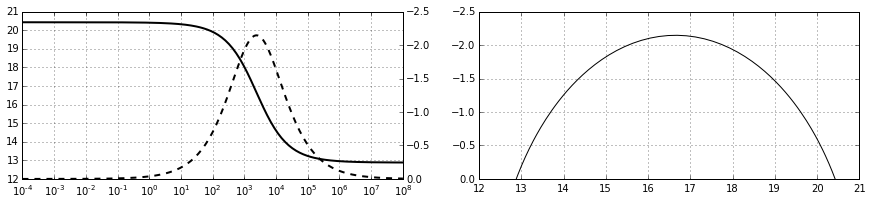

In [9]:
frequency = np.logspace(-4, 8, 211)
TKCColeColeParallel(frequency, "K1P-0825", data_active)

PK K1P-0807
R0 =  90.3895818681
Rinf =  90.337060378
Chargeability =  0.000581056898032
Taum =  9.99210583466
Taul =  0.00355078505315
0.4117 7.58e-09 6070000 0.0254618540473


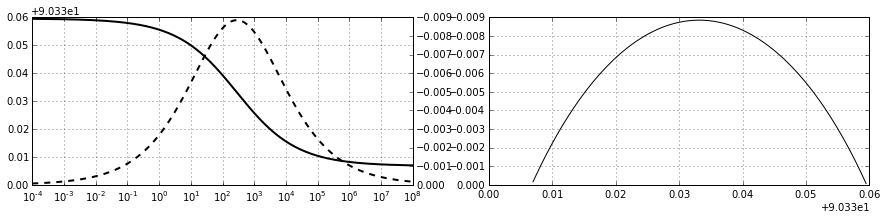

In [10]:
frequency = np.logspace(-4, 8, 211)
TKCColeColeParallel(frequency, "K1P-0807", data_active)

In [11]:
data_active[data_active['Facies']=='XVK']

,Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],Chargeability [ms],...,pQm,Rl,Ql,Pl,pRl,pQl,Re,Qe,Pe-f,Pe-i
43,XVK,K2P-0017,64.332627,-109.816663,174.1,0.000582,17.317279,0.021990,2.258028,0.5527,...,5.319e-06,302,5.039e-06,0.6464,1272,7.383e-07,10000000000,0.005847,0.3518,0.7189
45,XVK,K2P-0020,64.332627,-109.816663,204.5,0.000636,31.009713,0.021792,2.287620,0.3989,...,1.78e-06,582.8,3.038e-06,0.6517,2058,5.084e-07,10000000000,0.003093,0.2073,-2.149
47,XVK,K2P-0024,64.332627,-109.816663,235.0,0.000951,56.755824,0.021474,1.976504,0.4986,...,5.967e-07,1193,3.057e-06,0.5644,3226,6.21e-07,10000000000,0.00097,0.1622,-2.037
49,XVK,K2P-0031,64.332627,-109.816663,298.7,0.000287,15.608231,0.022568,2.218582,1.283,...,1.496e-05,404.3,4.406e-06,0.6611,499,1.492e-06,10000000000,0.005015,0.1692,-2.215
55,XVK,K2P-0077,NaN,NaN,117.4,0.001884,77.892755,0.022312,2.416544,0.3708,...,1.603e-07,689.7,1.121e-05,0.5675,14210,4.365e-07,10000000000,0.001363,0.66,-2.347
57,XVK,K2P-0147,64.332107,-109.815671,169.7,0.000851,15.092644,0.024129,2.005562,1.919,...,2.592e-05,409.2,4.285e-06,0.6811,339.6,1.809e-06,10000000000,0.006881,0.2626,0.6353
59,XVK,K2P-0157,64.332107,-109.815671,265.9,0.001072,81.146257,0.025534,1.562988,0.5288,...,5.852e-07,1715,1.801e-06,0.5704,2725,5.228e-07,10000000000,0.002796,0.1696,0.6351
60,XVK,K2P-0157,64.332107,-109.815671,265.9,0.001110,49.144266,0.021891,1.747999,0.6389,...,8.197e-07,1008,4.69e-06,0.5254,2767,9.43e-07,10000000000,0.008176,0.167,0.6575


XVK K2P-0031
R0 =  15.6781923439
Rinf =  6.55792039201
Chargeability =  0.581717059713
Taum =  9.93387042733
Taul =  0.000116539775997
0.6611 1.492e-06 499 0.0225682918438


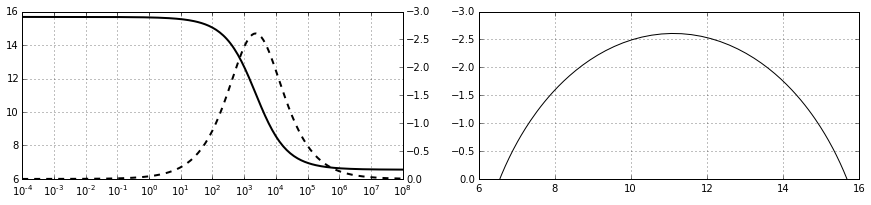

In [12]:
TKCColeColeParallel(frequency, "K2P-0031", data_active)

In [13]:
data_active[data_active['Facies']=='HK']

,Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],Chargeability [ms],...,pQm,Rl,Ql,Pl,pRl,pQl,Re,Qe,Pe-f,Pe-i
7,HK,K1P-0535,NaN,NaN,135.1,0.013182,10090.413234,0.022235,2.674294,45.6,...,1.036e-09,578400,7.246e-07,0.177,36980,6.445e-07,10000000000,0.0001862,0.4612,0.752
9,HK,K1P-0540,NaN,NaN,163.8,0.006001,2204.463074,0.022346,2.759935,18.31,...,3.046e-10,47360,8.84e-06,0.1809,151700,1.59e-06,10000000000,0.007566,0.4576,0.7399
19,HK,K1P-0591,64.326044,-109.812725,122.4,0.001167,47.798493,0.026205,2.385503,0.9152,...,6.146e-07,395,4.273e-05,0.4269,6645,1.992e-06,10000000000,0.001293,0.9516,0.7104
21,HK,K1P-0593,64.326044,-109.812725,135.4,0.004224,17612.473012,0.021637,2.608411,5.453,...,3.33e-12,216600,5.428e-07,0.2842,2370000,3.672e-08,10000000000,5.736e-05,0.941,1.935
23,HK,K1P-0595,64.326044,-109.812725,176.6,0.009333,572.919007,0.021410,2.644475,12.95,...,2.466e-09,7429,0.0001171,0.1597,91680,7.145e-06,10000000000,0.005917,0.5388,-0.1475


HK K1P-0591
R0 =  47.9557244624
Rinf =  37.6893424919
Chargeability =  0.21408042701
Taum =  9.98159580655
Taul =  0.000250332900856
0.4269 1.992e-06 6645 0.0262053139139


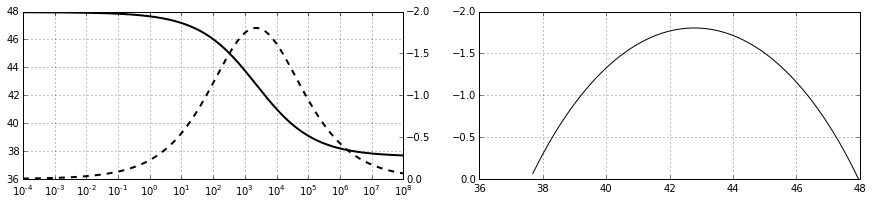

In [14]:
TKCColeColeParallel(frequency, "K1P-0591", data_active)

In [15]:
data_active[data_active['Facies']=='VK']

,Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],Chargeability [ms],...,pQm,Rl,Ql,Pl,pRl,pQl,Re,Qe,Pe-f,Pe-i
3,VK,K1P-0240,NaN,NaN,111.6,0.000642,38.183914,0.030233,2.221620,0.5439,...,2.866e-06,602.3,3.2e-06,0.665,1393,7.25e-07,10000000000,0.002534,0.2067,-2.121
5,VK,K1P-0531,NaN,NaN,87.5,0.000603,13501.390421,0.022101,2.545503,0.6497,...,6.92e-12,185300,5.433e-08,0.433,1410000,4.978e-09,10000000000,9.698e-06,0.2674,0.03658
15,VK,K1P-0589,64.326044,-109.812725,78.0,0.000628,48.916840,0.022245,2.099668,0.2669,...,6.115e-07,762.8,2.624e-06,0.6791,4150,3.152e-07,10000000000,0.0009501,0.5222,1.534
16,VK,K1P-0589,64.326044,-109.812725,78.0,NaN,49.965791,0.021649,2.084449,NaN,...,4.922e-07,706.7,4.353e-06,0.6424,5240,4.074e-07,10000000000,0.002632,0.231,1.847
17,VK,K1P-0590,64.326044,-109.812725,85.9,0.000766,187.757995,0.022602,2.403881,0.7856,...,3.426e-08,2247,6.04e-06,0.5753,22500,4.404e-07,10000000000,0.0008284,0.2171,-2.034
18,VK,K1P-0590,64.326044,-109.812725,85.9,0.000782,66.229958,0.022322,2.296125,0.2139,...,3.486e-07,1064,1.697e-06,0.7258,5315,2.18e-07,10000000000,0.0005173,0.4395,-2.239


VK K1P-0589
R0 =  48.9613299999
Rinf =  31.9977236027
Chargeability =  0.346469476978
Taum =  9.98711116994
Taul =  0.000356711142256
0.6791 3.152e-07 4150 0.0222450386188


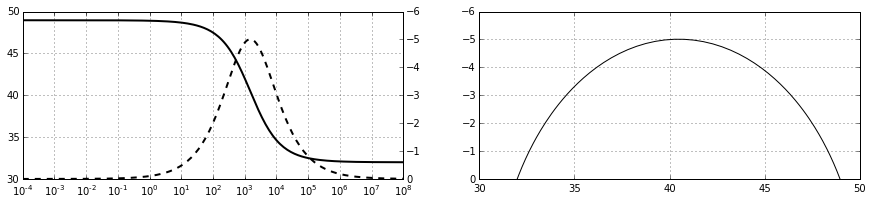

In [16]:
TKCColeColeParallel(frequency, "K1P-0589", data_active)

In [17]:
RlPK = data_active[data_active['Facies']=='PK']["pRl"].values[:]
QlPK = data_active[data_active['Facies']=='PK']["pQl"].values[:]
PlPK = data_active[data_active['Facies']=='PK']["Pl"].values[:]
fpeakPK = f0peak(RlPK, QlPK, PlPK)
rhoinfPK = rhoinf(data_active[data_active['Facies']=='PK']["Ro"].values[:], data_active[data_active['Facies']=='PK']["pRm"].values[:],data_active[data_active['Facies']=='PK']["pRl"].values[:])
mPK = charg(rhoinfPK, data_active[data_active['Facies']=='PK']["Ro"].values[:])

In [18]:
RlXVK = data_active[data_active['Facies']=='XVK']["pRl"].values[:]
QlXVK = data_active[data_active['Facies']=='XVK']["pQl"].values[:]
PlXVK = data_active[data_active['Facies']=='XVK']["Pl"].values[:]
fpeakXVK = f0peak(RlXVK, QlXVK, PlXVK)
rhoinfXVK = rhoinf(data_active[data_active['Facies']=='XVK']["Ro"].values[:], data_active[data_active['Facies']=='XVK']["pRm"].values[:],data_active[data_active['Facies']=='XVK']["pRl"].values[:])
mXVK = charg(rhoinfXVK, data_active[data_active['Facies']=='XVK']["Ro"].values[:])

In [19]:
RlVK = data_active[data_active['Facies']=='VK']["pRl"].values[:]
QlVK = data_active[data_active['Facies']=='VK']["pQl"].values[:]
PlVK = data_active[data_active['Facies']=='VK']["Pl"].values[:]
fpeakVK = f0peak(RlVK, QlVK, PlVK)
rhoinfVK = rhoinf(data_active[data_active['Facies']=='VK']["Ro"].values[:], data_active[data_active['Facies']=='VK']["pRm"].values[:],data_active[data_active['Facies']=='VK']["pRl"].values[:])
mVK = charg(rhoinfVK, data_active[data_active['Facies']=='VK']["Ro"].values[:])

In [20]:
RlHK = data_active[data_active['Facies']=='HK']["pRl"].values[:]
QlHK = data_active[data_active['Facies']=='HK']["pQl"].values[:]
PlHK = data_active[data_active['Facies']=='HK']["Pl"].values[:]
fpeakHK = f0peak(RlHK, QlHK, PlHK)
rhoinfHK = rhoinf(data_active[data_active['Facies']=='HK']["Ro"].values[:], data_active[data_active['Facies']=='HK']["pRm"].values[:],data_active[data_active['Facies']=='HK']["pRl"].values[:])
mHK = charg(rhoinfHK, data_active[data_active['Facies']=='HK']["Ro"].values[:])

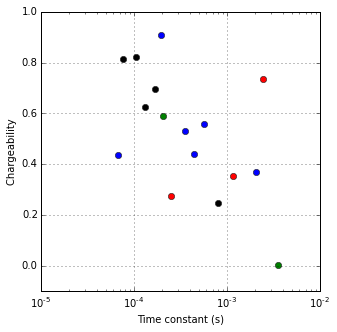

In [24]:
indactHK = 1./fpeakHK > 0.1
plt.semilogx(1./fpeakXVK, mXVK, 'ko')
plt.semilogx(1./fpeakVK, mVK, 'bo')
plt.semilogx(1./fpeakHK[~indactHK], mHK[~indactHK], 'ro')
plt.semilogx(1./fpeakPK, mPK, 'go')

ylim(-0.1, 1.)
xlim(1e-5, 1e-2)
plt.grid(True)
plt.ylabel("Chargeability ")
plt.xlabel("Time constant (s)")
figsize(5,5)

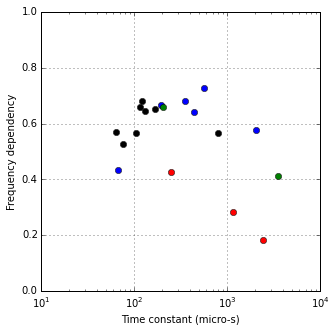

In [25]:
mus = 1e6
plt.semilogx(1./fpeakXVK*mus, PlXVK,'ko')
plt.semilogx(1./fpeakVK*mus, PlVK, 'bo')
plt.semilogx(1./fpeakHK[~indactHK]*mus, PlHK[~indactHK], 'ro')
plt.semilogx(1./fpeakPK*mus, PlPK, 'go')

ylim(0., 1.)
xlim(1e-5*mus, 1e-2*mus)
plt.grid(True)
# plt.legend(("XVK", "VK", "HK", "PK"), loc=4)
plt.ylabel("Frequency dependency ")
plt.xlabel("Time constant (micro-s)")
figsize(5,5)

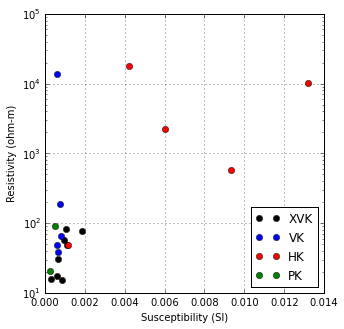

In [26]:
plt.semilogy(data_active[data_active["Facies"]=="XVK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="XVK"]["Resistivity [Ohm.m]"], 'ko')
plt.semilogy(data_active[data_active["Facies"]=="VK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="VK"]["Resistivity [Ohm.m]"], 'bo')
plt.semilogy(data_active[data_active["Facies"]=="HK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="HK"]["Resistivity [Ohm.m]"], 'ro')
plt.semilogy(data_active[data_active["Facies"]=="PK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="PK"]["Resistivity [Ohm.m]"], 'go')
plt.grid(True)
plt.legend(("XVK", "VK", "HK", "PK"), loc=4)
plt.xlabel("Susceptibility (SI)")
plt.ylabel("Resistivity (ohm-m)")
figsize(5,5)

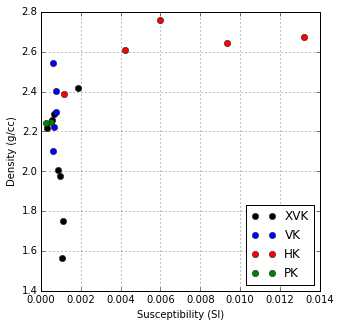

In [27]:
plt.plot(data_active[data_active["Facies"]=="XVK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="XVK"]["Sat Geometric Dens [g/cc]"], 'ko')
plt.plot(data_active[data_active["Facies"]=="VK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="VK"]["Sat Geometric Dens [g/cc]"], 'bo')
plt.plot(data_active[data_active["Facies"]=="HK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="HK"]["Sat Geometric Dens [g/cc]"], 'ro')
plt.plot(data_active[data_active["Facies"]=="PK"]["Mag Susc [SI]"], data_active[data_active["Facies"]=="PK"]["Sat Geometric Dens [g/cc]"], 'go')

plt.grid(True)
plt.legend(("XVK", "VK", "HK", "PK"), loc=4)
plt.xlabel("Susceptibility (SI)")
plt.ylabel("Density (g/cc)")
figsize(5,5)